# Predicting Titanic Survivors

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of new windoe
%matplotlib inline

## Load and review data

In [84]:
df = pd.read_csv("./data/titanic.csv")

In [85]:
df.shape

(891, 12)

In [86]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Definition of features

| Feature  | Description | Comments |
|-------------|-------------|--------|
| PassengerId |             |
| Survived    |             |
| Pclass      | Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd
| Name        | Age in years|
| Sex         |             |
| Age         |             |
| SibSp       | # of siblings / spouses aboard the Titanic |
| Parch       | # of parents / children aboard the Titanic |
| Ticket      | Ticket number           |
| Fare        | Passenger fare          |
| Cabin       | Cabin number            |
| Embarked    | Port of Embarkation     | C = Cherbourg, Q = Queenstown, S = Southampton

### Check for null values

In [88]:
df.isnull().values.any()

True

In [89]:
df.isnull().values

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [90]:
#

In [91]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

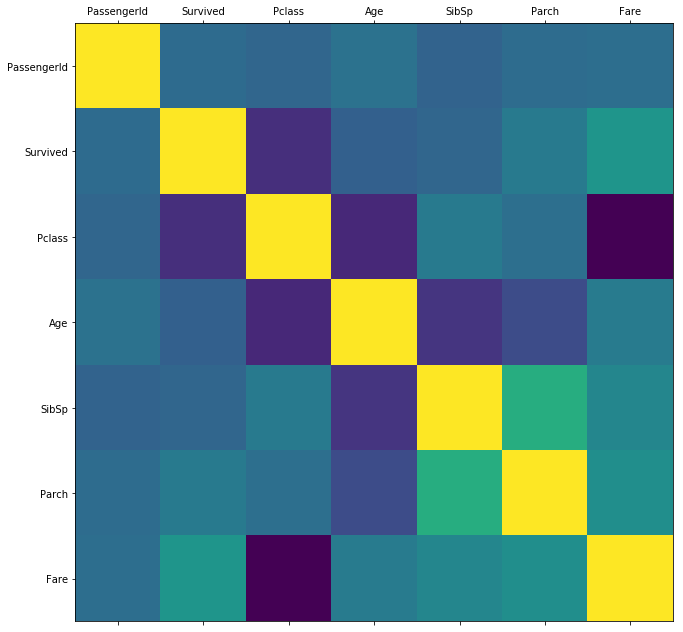

In [92]:
plot_corr(df)

In [93]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Pclass and Fare has a rather strong correlation. I will delete Fare column.

In [94]:
del df['Fare']

PassengerId, Name, Ticket, Embarked should reasonably have no predictiong value on survival. I will delete PassengerId column. Cabin contains NaN values and I will delete that too.

In [95]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Embarked']
del df['Cabin']

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [96]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Sex column contains valie male and female. We will change that to numbers 0 and 1.

In [97]:
sex_map = {'male' : 0, 'female' : 1}
df['Sex'] = df['Sex'].map(sex_map)

Verify that the sex data type has been changed.

In [98]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


### Check for null values

In [99]:
df.isnull().values.any()

True

Age is sometimes null. This should be fixed. Filling in Age with mean age.

In [100]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [101]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


### Check total survival ratio

In [102]:
num_obs = len(df)
num_true = len(df.loc[df['Survived'] == 1])
num_false = len(df.loc[df['Survived'] == 0])
print("Number of Survived cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of Died cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of Survived cases:  342 (38.38%)
Number of Died cases: 549 (61.62%)


## Save pre-processed dataframe for later use

In [103]:
df.to_pickle("./data/titanic-processed.p")

### Spliting the data 

70% for training, 30% for testing

In [104]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
predicted_class_names = ['Survived']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=85) 
                            # test_size = 0.3 is 30%

Check to ensure the desired 70% train, 30% test split of the data

In [105]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

In [106]:
print("Original Survived : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 1]), (len(df.loc[df['Survived'] == 1])/len(df.index)) * 100.0))
print("Original Died     : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 0]), (len(df.loc[df['Survived'] == 0])/len(df.index)) * 100.0))
print("")
print("Training Survived : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Died     : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test Survived : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Died     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original Survived : 342 (38.38%)
Original Died     : 549 (61.62%)

Training Survived : 248 (39.81%)
Training Died     : 375 (60.19%)

Test Survived : 94 (35.07%)
Test Died     : 174 (64.93%)


In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


## Algorithm - Naive Bayes

### Training

In [108]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [109]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7817



### Performance on Testing Data

In [110]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.7612


#### Metrics

In [111]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[138  36]
 [ 28  66]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.79      0.81       174
          1       0.65      0.70      0.67        94

avg / total       0.77      0.76      0.76       268



## Algorithm - Random Forest

### Training

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [113]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9149


### Predict Test Data

In [114]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8246


In [115]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[148  26]
 [ 21  73]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.85      0.86       174
          1       0.74      0.78      0.76        94

avg / total       0.83      0.82      0.83       268



## Algoritm Logistic Regression

### Training

In [116]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=89)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=89, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict Training Data

In [117]:
lr_predict_train = lr_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.8090


### Predict Test Data

In [118]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Accuracy: 0.8060


In [119]:
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")

print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

[[152  22]
 [ 30  64]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       174
          1       0.74      0.68      0.71        94

avg / total       0.80      0.81      0.80       268



## Algoritm LogisticRegressionCV
Algoritm + Cross Validation = AlgoritmCV

### Training

In [120]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict Training Data

In [121]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

Accuracy: 0.7961


### Predict Test Data

In [122]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Accuracy: 0.7910


In [123]:
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7910
[[140  34]
 [ 22  72]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.80      0.83       174
          1       0.68      0.77      0.72        94

avg / total       0.80      0.79      0.79       268



## XGBoost Classification (XGBClassifier)
With no Model Tuning

### Import and Training

In [124]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Predict Training Data

In [125]:
xgb_predict_train = xgb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, xgb_predict_train)))


Accuracy: 0.8571


C:\Users\Snigel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Predict Test Data

In [126]:
xgb_predict_test = xgb_model.predict(X_test)

C:\Users\Snigel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [127]:
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, xgb_predict_test)))
print(metrics.confusion_matrix(y_test, xgb_predict_test) )
print("")
print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")
print("Classification Report")
print(metrics.classification_report(y_test, xgb_predict_test))

Accuracy: 0.8209
[[153  21]
 [ 27  67]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.85      0.88      0.86       174
          1       0.76      0.71      0.74        94

avg / total       0.82      0.82      0.82       268



## XGBoost Classification (XGBClassifier)
With Model Tuning:
- n_estimators
- early_stopping_rounds
- learning_rate

### Import and Training

In [128]:
from xgboost import XGBClassifier
tuned_xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.5)

tuned_xgb_model.fit(X_train, y_train.ravel(),
                   eval_set=[(X_test, y_test.ravel())], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Predict Training Data

In [129]:
tuned_xgb_predict_train = tuned_xgb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, tuned_xgb_predict_train)))


Accuracy: 0.9197


C:\Users\Snigel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Predict Test Data

In [130]:
tuned_xgb_predict_test = tuned_xgb_model.predict(X_test)

C:\Users\Snigel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, tuned_xgb_predict_test)))
print(metrics.confusion_matrix(y_test, tuned_xgb_predict_test) )
print("")
print("Confusion Matrix")
print(" [True Negative, False Positive]")
print(" [False Negative, True Positive]")
print("")
print("Classification Report")
print(metrics.classification_report(y_test, tuned_xgb_predict_test))

Accuracy: 0.8097
[[147  27]
 [ 24  70]]

Confusion Matrix
 [True Negative, False Positive]
 [False Negative, True Positive]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       174
          1       0.72      0.74      0.73        94

avg / total       0.81      0.81      0.81       268

